In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"D:\Ultimate Programming\Data Bases\Machine Learning Datasets\Property Price Prediction.xlsx")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [3]:
df.isnull().sum().sum()

np.int64(207)

In [4]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mode()[0])

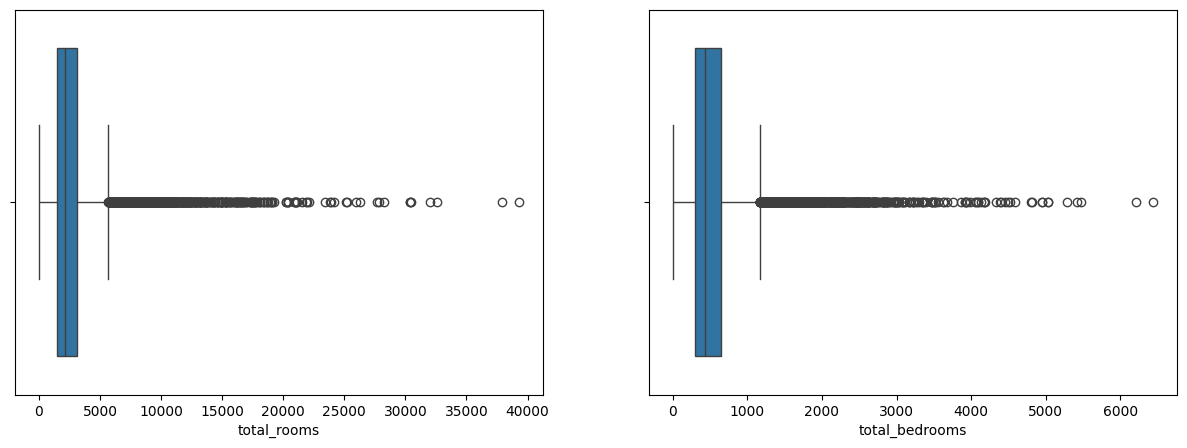

In [5]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['total_rooms'])

plt.subplot(1,2,2)
sns.boxplot(x=df['total_bedrooms'])
plt.show()

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,535.284351,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.053240,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
q1 = df['total_bedrooms'].quantile(.25)
q3 = df['total_bedrooms'].quantile(.75)

iqr = q3- q1
min_range = q1 - 1.5*iqr
max_range = q3 + 1.5*iqr
df = df[df['total_bedrooms']<max_range]

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19361.000000,19361.000000,19361.000000,19361.000000,19361.000000,19361.000000,19361.000000,19361.000000,19361.000000
mean,-119.597904,35.656274,29.401787,2257.725737,455.835391,1244.221683,429.782656,3.867607,206017.055214
std,2.000750,2.144298,12.380485,1243.389826,235.774285,701.277009,223.409704,1.916711,115904.124218
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.940000,19.000000,1406.000000,284.000000,766.000000,272.000000,2.554200,118200.000000
50%,-118.530000,34.270000,30.000000,2037.000000,414.000000,1119.000000,392.000000,3.527800,178300.000000
75%,-118.030000,37.720000,38.000000,2896.000000,592.000000,1593.000000,557.000000,4.741100,263800.000000
max,-114.490000,41.950000,52.000000,11709.000000,1170.000000,8733.000000,3589.000000,15.000100,500001.000000


In [9]:
x = df[['total_rooms']]
y = df[['total_bedrooms']]

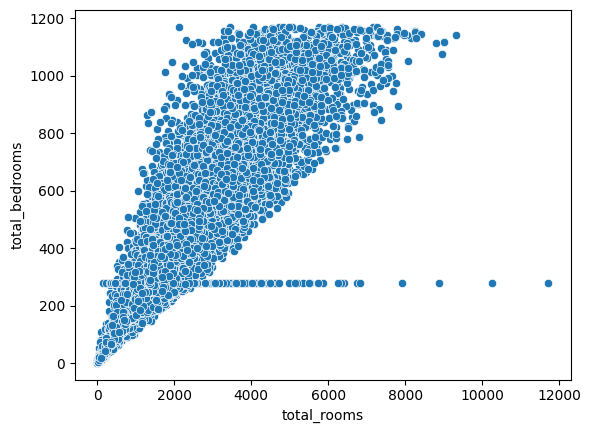

In [10]:
sns.scatterplot(data=df, x='total_rooms', y='total_bedrooms')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [13]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500


In [14]:
lr.predict([[880]])

array([[229.73895663]])

In [15]:
lr.score(x_test, y_test)*100

74.9902977685383

In [16]:
lr.coef_

array([[0.16371086]])

In [17]:
lr.intercept_

array([85.67339693])

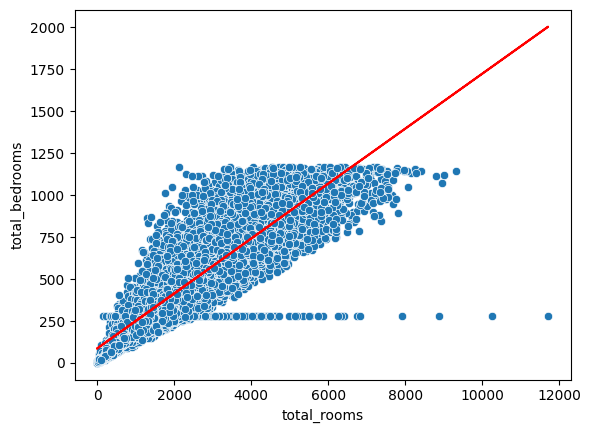

In [18]:
sns.scatterplot(data=df, x=df['total_rooms'], y=df['total_bedrooms'])
plt.plot(df['total_rooms'], lr.predict(df[['total_rooms']]), c='red')
plt.show()

# Cost Function

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

print(f"mean_squared_error : {mean_squared_error(y_test, lr.predict(x_test)):.2f}")
print(f"mean_absolute_error: {mean_absolute_error(y_test, lr.predict(x_test)):.2f}")
print(f"root_mean_squared_error : {root_mean_squared_error(y_test, lr.predict(x_test)):.2f}")

mean_squared_error : 13957.21
mean_absolute_error: 84.90
root_mean_squared_error : 118.14


# End